In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class Discriminator(nn.Module):
    def __init__(self, img_dim = 784, hidden_dim = 128):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(img_dim, hidden_dim),
            nn.LeakyReLU(0.01),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.disc(x)
    

In [3]:
class Generator(nn.Module):
    def __init__(self, z_dim = 64, img_dim = 784, hidden_dim = 256):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, hidden_dim),
            nn.LeakyReLU(0.01),
            nn.Linear(hidden_dim, img_dim),
            nn.Tanh(),  # normalize inputs to [-1, 1] so make outputs [-1, 1]
        )

    def forward(self, x):
        return self.gen(x)

In [9]:
# Hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 3e-4 # Learning rate
z_dim = 64 # Noise vector size
image_dim = 28 * 28 * 1 # 784 (mnist)
batch_size = 32
num_epochs = 100

In [10]:
disc = Discriminator(image_dim).to(device)
gen = Generator(z_dim, image_dim).to(device)

# to see how it changes over epochs
fixed_noise = torch.randn((batch_size, z_dim)).to(device)

In [11]:
# Dataset and dataloader
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),]
)

dataset = datasets.MNIST(root="dataset/", transform=transform, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Optimizer
opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

In [12]:
# Tensorboard writer
writer_fake = SummaryWriter(f"runs/GAN_MNIST/fake")
writer_real = SummaryWriter(f"runs/GAN_MNIST/real")

# tensorboard step
step = 0 

Epoch: [0/100] \ LossD: 0.70901334, LossG: 0.69574499


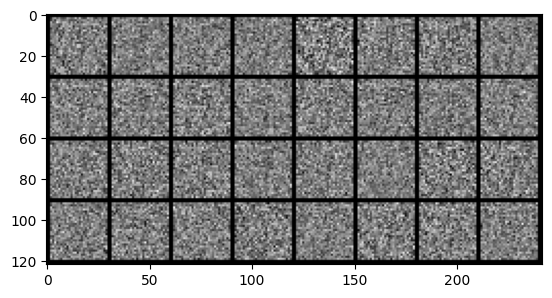

Epoch: [1/100] \ LossD: 0.29928848, LossG: 1.72886038
Epoch: [2/100] \ LossD: 0.59667945, LossG: 1.13885355
Epoch: [3/100] \ LossD: 0.61763823, LossG: 0.89599866
Epoch: [4/100] \ LossD: 0.49109155, LossG: 1.18077922
Epoch: [5/100] \ LossD: 0.53949809, LossG: 0.97283959


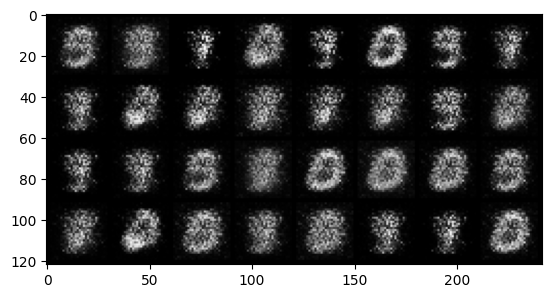

Epoch: [6/100] \ LossD: 0.50448281, LossG: 1.20136118
Epoch: [7/100] \ LossD: 0.57693887, LossG: 1.08387041
Epoch: [8/100] \ LossD: 0.23820245, LossG: 2.24777222
Epoch: [9/100] \ LossD: 0.74515289, LossG: 1.00521421
Epoch: [10/100] \ LossD: 0.55757940, LossG: 1.29737651


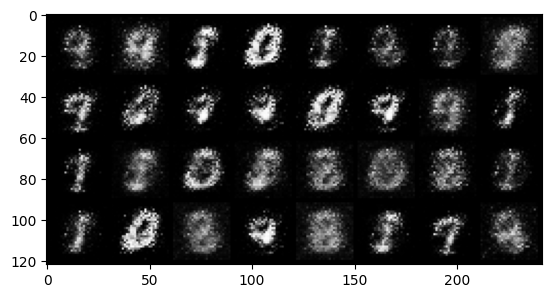

Epoch: [11/100] \ LossD: 0.50909579, LossG: 1.07572675
Epoch: [12/100] \ LossD: 0.40838924, LossG: 1.50334287
Epoch: [13/100] \ LossD: 0.55133289, LossG: 1.45641708
Epoch: [14/100] \ LossD: 0.63828433, LossG: 1.01513648
Epoch: [15/100] \ LossD: 0.44952273, LossG: 1.35417175


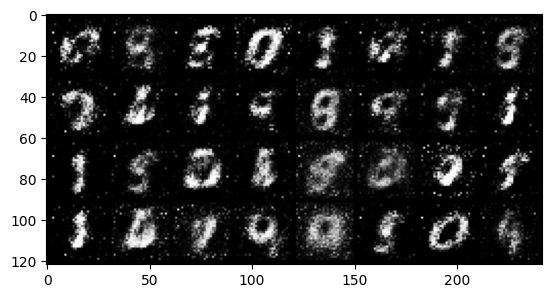

Epoch: [16/100] \ LossD: 0.70284104, LossG: 0.90447658
Epoch: [17/100] \ LossD: 0.51412678, LossG: 1.43167996
Epoch: [18/100] \ LossD: 0.49305242, LossG: 1.45553935
Epoch: [19/100] \ LossD: 0.55121195, LossG: 1.65217829
Epoch: [20/100] \ LossD: 0.58962792, LossG: 1.53285789


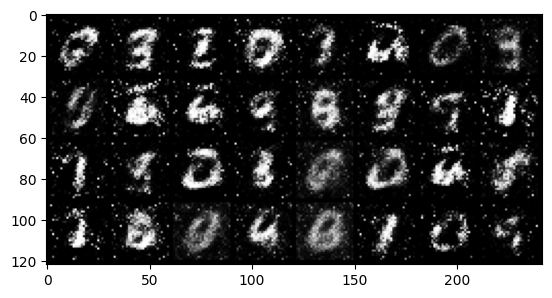

Epoch: [21/100] \ LossD: 0.57433122, LossG: 1.33905244
Epoch: [22/100] \ LossD: 0.57861459, LossG: 1.71639621
Epoch: [23/100] \ LossD: 0.49735194, LossG: 1.22638023
Epoch: [24/100] \ LossD: 0.59231776, LossG: 1.44703555
Epoch: [25/100] \ LossD: 0.68539882, LossG: 1.33883464


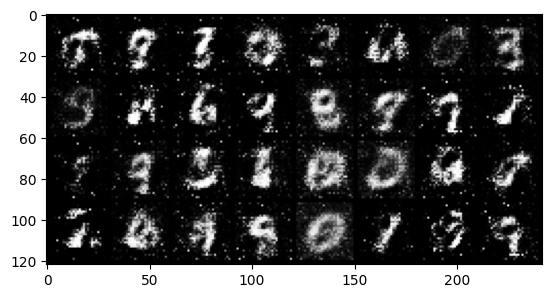

Epoch: [26/100] \ LossD: 0.69427550, LossG: 1.38670802
Epoch: [27/100] \ LossD: 0.51645213, LossG: 1.66324544
Epoch: [28/100] \ LossD: 0.43016621, LossG: 2.01799917
Epoch: [29/100] \ LossD: 0.58571452, LossG: 1.44517577
Epoch: [30/100] \ LossD: 0.65348709, LossG: 1.58512127


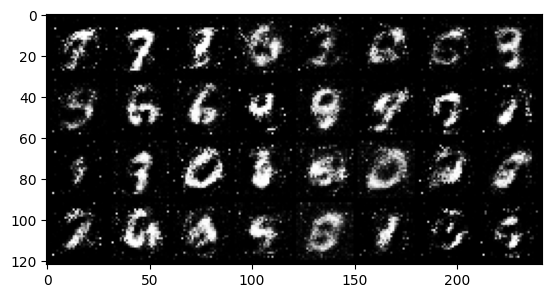

Epoch: [31/100] \ LossD: 0.67120665, LossG: 1.41951060
Epoch: [32/100] \ LossD: 0.57032430, LossG: 1.53689599
Epoch: [33/100] \ LossD: 0.66328067, LossG: 1.11843705
Epoch: [34/100] \ LossD: 0.60881430, LossG: 1.17207956
Epoch: [35/100] \ LossD: 0.49913773, LossG: 1.41022038


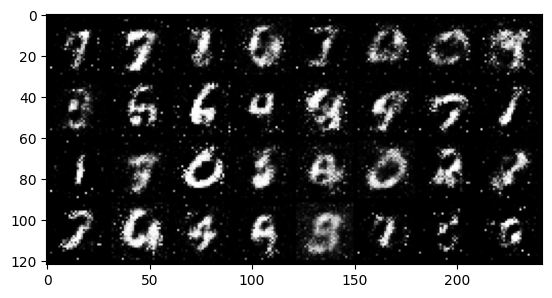

Epoch: [36/100] \ LossD: 0.50502264, LossG: 1.20518923
Epoch: [37/100] \ LossD: 0.66174257, LossG: 1.53695858
Epoch: [38/100] \ LossD: 0.53200316, LossG: 1.23085570
Epoch: [39/100] \ LossD: 0.60892707, LossG: 1.63759112
Epoch: [40/100] \ LossD: 0.71989906, LossG: 1.15245402


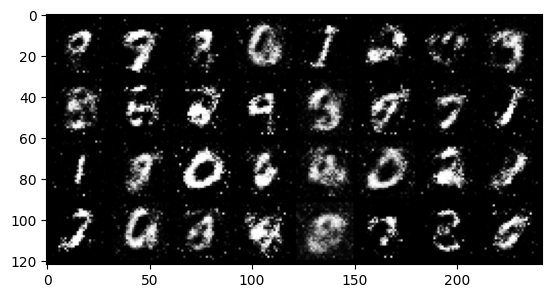

Epoch: [41/100] \ LossD: 0.56861067, LossG: 1.37703252
Epoch: [42/100] \ LossD: 0.48957354, LossG: 1.54366469
Epoch: [43/100] \ LossD: 0.51719368, LossG: 1.64134359
Epoch: [44/100] \ LossD: 0.92657125, LossG: 0.93051279
Epoch: [45/100] \ LossD: 0.50741470, LossG: 1.39392829


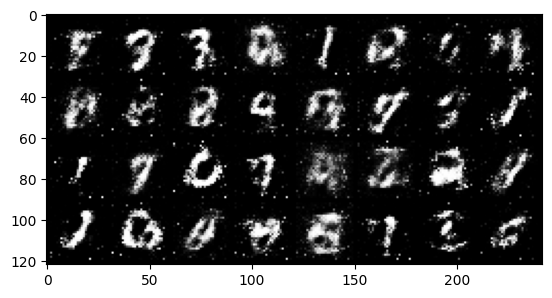

Epoch: [46/100] \ LossD: 0.66310579, LossG: 1.04537177
Epoch: [47/100] \ LossD: 0.58660281, LossG: 1.51557493
Epoch: [48/100] \ LossD: 0.60936809, LossG: 1.63157785
Epoch: [49/100] \ LossD: 0.74433064, LossG: 0.90161514
Epoch: [50/100] \ LossD: 0.45964187, LossG: 1.42851734


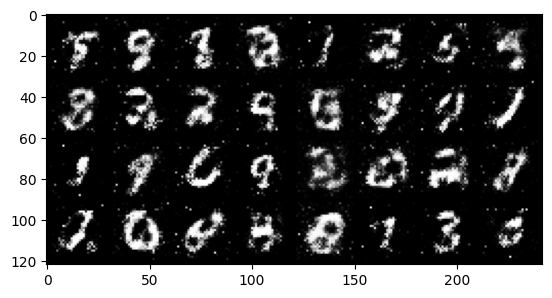

Epoch: [51/100] \ LossD: 0.53265262, LossG: 1.21984577
Epoch: [52/100] \ LossD: 0.63533843, LossG: 1.12270737
Epoch: [53/100] \ LossD: 0.69433045, LossG: 0.98985803
Epoch: [54/100] \ LossD: 0.66864097, LossG: 0.90654016
Epoch: [55/100] \ LossD: 0.60344237, LossG: 0.86204237


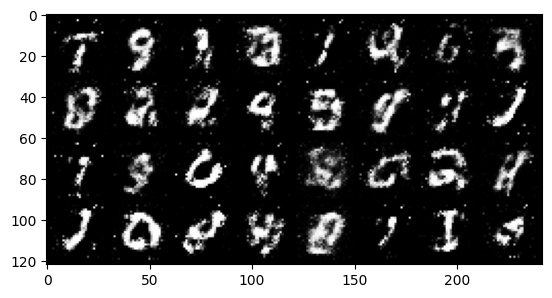

Epoch: [56/100] \ LossD: 0.55073529, LossG: 0.96614683
Epoch: [57/100] \ LossD: 0.63226390, LossG: 1.10095525
Epoch: [58/100] \ LossD: 0.61983371, LossG: 0.81650925
Epoch: [59/100] \ LossD: 0.59203446, LossG: 1.05964756
Epoch: [60/100] \ LossD: 0.75140244, LossG: 0.79658234


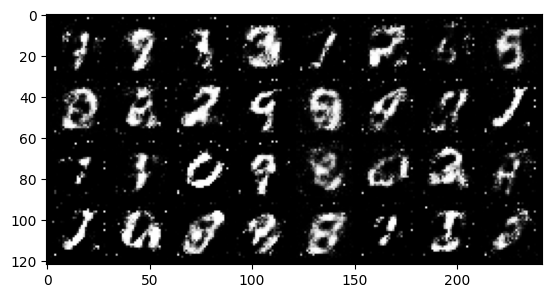

Epoch: [61/100] \ LossD: 0.54427564, LossG: 1.02697873
Epoch: [62/100] \ LossD: 0.65697312, LossG: 0.91104072
Epoch: [63/100] \ LossD: 0.58137435, LossG: 1.10465646
Epoch: [64/100] \ LossD: 0.54723305, LossG: 0.91295624
Epoch: [65/100] \ LossD: 0.76974255, LossG: 0.90053326


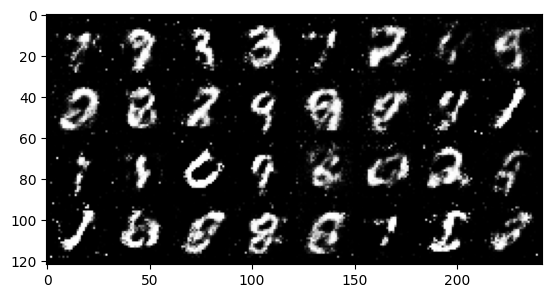

Epoch: [66/100] \ LossD: 0.70984358, LossG: 0.88495576
Epoch: [67/100] \ LossD: 0.65104651, LossG: 1.07329893
Epoch: [68/100] \ LossD: 0.58892536, LossG: 0.90758574
Epoch: [69/100] \ LossD: 0.62869930, LossG: 0.97587180
Epoch: [70/100] \ LossD: 0.64039326, LossG: 0.86505258


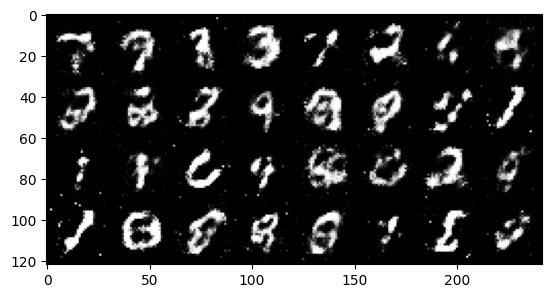

Epoch: [71/100] \ LossD: 0.65793383, LossG: 0.93247306
Epoch: [72/100] \ LossD: 0.64017487, LossG: 0.89027393
Epoch: [73/100] \ LossD: 0.69036424, LossG: 0.83191144
Epoch: [74/100] \ LossD: 0.51672345, LossG: 1.19494987
Epoch: [75/100] \ LossD: 0.70346683, LossG: 0.71977431


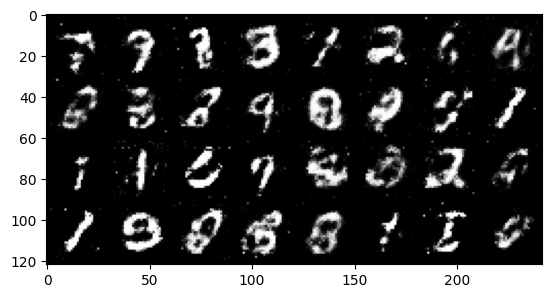

Epoch: [76/100] \ LossD: 0.58823371, LossG: 0.97007775
Epoch: [77/100] \ LossD: 0.74562263, LossG: 0.79293543
Epoch: [78/100] \ LossD: 0.69700158, LossG: 0.76227176
Epoch: [79/100] \ LossD: 0.70958769, LossG: 0.76749974
Epoch: [80/100] \ LossD: 0.62100554, LossG: 0.98537028


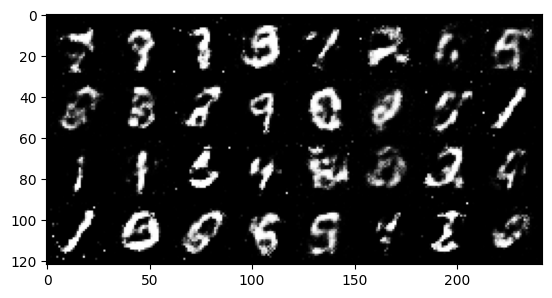

Epoch: [81/100] \ LossD: 0.60757768, LossG: 0.96510357
Epoch: [82/100] \ LossD: 0.59982491, LossG: 1.00454235
Epoch: [83/100] \ LossD: 0.62642574, LossG: 0.87728393
Epoch: [84/100] \ LossD: 0.66156554, LossG: 0.88450062
Epoch: [85/100] \ LossD: 0.60966116, LossG: 0.83152020


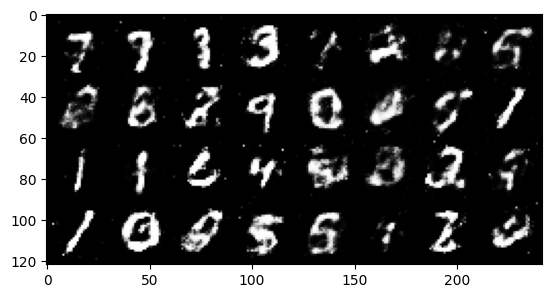

Epoch: [86/100] \ LossD: 0.55793643, LossG: 0.88510931
Epoch: [87/100] \ LossD: 0.62415969, LossG: 0.82189596
Epoch: [88/100] \ LossD: 0.58053744, LossG: 0.90117276
Epoch: [89/100] \ LossD: 0.60155749, LossG: 0.93073469
Epoch: [90/100] \ LossD: 0.60878056, LossG: 0.86418504


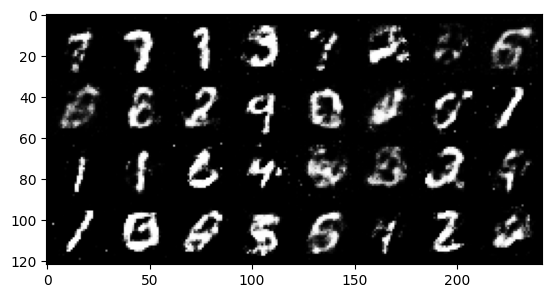

Epoch: [91/100] \ LossD: 0.64928794, LossG: 0.85579383
Epoch: [92/100] \ LossD: 0.63112271, LossG: 0.91983628
Epoch: [93/100] \ LossD: 0.63410145, LossG: 0.88200229
Epoch: [94/100] \ LossD: 0.65135199, LossG: 0.90879136
Epoch: [95/100] \ LossD: 0.59629732, LossG: 1.00805080


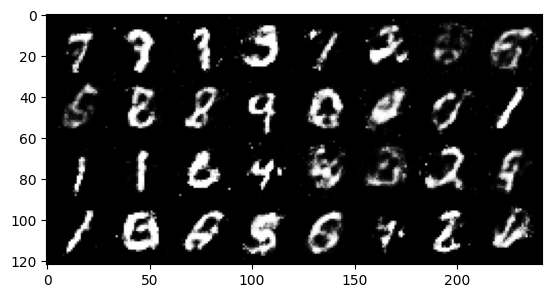

Epoch: [96/100] \ LossD: 0.61024964, LossG: 0.93010515
Epoch: [97/100] \ LossD: 0.55998874, LossG: 1.04235303
Epoch: [98/100] \ LossD: 0.54027128, LossG: 0.96466494
Epoch: [99/100] \ LossD: 0.66799521, LossG: 0.81033367


In [13]:
# Training
for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate (loader):
        real = real.view(-1, 784).to(device) # real images

        # Train Discriminator: max log(D(real)) + log(1 - D(G(z)))
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = gen(noise) # fake images

        disc_real = disc(real).view(-1) # real images
        lossD_real = criterion(disc_real, torch.ones_like(disc_real)) # Check Md Cell below 
    
        disc_fake = disc(fake).view(-1) # fake images
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake)) # Check Md Cell below 

        lossD = (lossD_real + lossD_fake) / 2 # average loss
        # Backpropagation (discriminator)
        disc.zero_grad()
        lossD.backward(retain_graph=True) # retain_graph=True to avoid error when backpropagating to generator 
        # Update weights
        opt_disc.step()

        # Train Generator: min log(1 - D(G(z))) <-> max log(D(G(z))
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output)) # Check Md Cell below
        # Backpropagation (generator)
        gen.zero_grad()
        lossG.backward()
        # Update weights
        opt_gen.step()
        

        # Print losses occasionally and print to tensorboard
        if batch_idx == 0:
            print(
                f"Epoch: [{epoch}/{num_epochs}] \ "
                f"LossD: {lossD:.8f}, LossG: {lossG:.8f}"
            )

            with torch.no_grad():
                fake = gen(fixed_noise).reshape(-1, 1, 28, 28)
                data = real.reshape(-1, 1, 28, 28)
                
                img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
                img_grid_real = torchvision.utils.make_grid(data, normalize=True)

                # write to tensorboard
                # writer fake images
                writer_fake.add_image(
                    "Mnist Fake Images", img_grid_fake, global_step=step
                )
                # writer real images
                writer_real.add_image(
                    "Mnist Real Images", img_grid_real, global_step=step
                )
                step += 1
                
    if epoch % 5 == 0:
        plt.imshow(img_grid_fake.to("cpu").permute(1, 2, 0))
        plt.show()
            

Why using `torch.ones_like` and `torch.zeros_like` in `lossD_real` and `lossD_fake`?

here's BCE formula:

$\mathrm{BCE} = -\frac{1}{N}\sum_{i=1}^{N} y_i\log(x_i) + (1-y_i)\log(1-x_i)$

- in `lossD_real`: using `torch.ones_like` since $y_i=1$, so we can get $\mathrm{BCE} = -\frac{1}{N}\sum_{i=1}^{N} \log(x_i)$

- in `lossD_fake`: using `torch.zeros_like` since $y_i=0$, so we can get $\mathrm{BCE} = -\frac{1}{N}\sum_{i=1}^{N} \log(1-x_i)$